In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv('cars.csv')
df.tail()

,modelo,cilindraje,potencia,peso,consumo
20,Citroen,1998,89,1140,8.8
21,Peugeot,1998,89,1560,10.8
22,Fiat,899,29,730,6.1
23,Seat,1984,85,1635,11.6
24,Ford,1242,55,940,6.6


In [2]:
Y=df['consumo'].values
Z=df['modelo']
df = df.drop(['consumo','modelo'],axis=1)
X=df.values

In [3]:
print(Y,X)

[14.5  5.7  7.1  8.6 10.8 12.7 12.8 11.7  7.7  9.5  5.8 11.9 18.7 10.8
  6.5 11.7  6.8  7.4  9.   7.6  8.8 10.8  6.1 11.6  6.6] [[2789  209 1485]
 [ 846   32  650]
 [1331   55 1010]
 [1390   54 1110]
 [2497  122 1330]
 [2473  125 1570]
 [2438   97 1800]
 [2165  101 1500]
 [1396   66 1140]
 [1984   85 1155]
 [ 993   39  790]
 [2958  150 1550]
 [5987  300 2250]
 [2435  106 1370]
 [1390   44  955]
 [2972  107 1400]
 [1195   33  895]
 [1597   74 1080]
 [1761   74 1100]
 [1998   66 1300]
 [1998   89 1140]
 [1998   89 1560]
 [ 899   29  730]
 [1984   85 1635]
 [1242   55  940]]


In [4]:
olsmod = sm.OLS(Y, X)
olsres = olsmod.fit()
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1497.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.43e-25
Time:                        20:54:51   Log-Likelihood:                         -26.818
No. Observations:                  25   AIC:                                      59.64
Df Residuals:                      22   BIC:                                      63.29
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [5]:
for i in range(0,20):
    print('El valor calculado es', olsres.predict(X[i]), ' y debía ser', Y[i], ' con un error de', abs(olsres.predict(X[i])-Y[i])/Y[i]*100, '%')

El valor calculado es [13.77501134]  y debía ser 14.5  con un error de [4.99992177] %
El valor calculado es [4.66186803]  y debía ser 5.7  con un error de [18.21284159] %
El valor calculado es [7.3749134]  y debía ser 7.1  con un error de [3.87201968] %
El valor calculado es [7.97559553]  y debía ser 8.6  con un error de [7.26051704] %
El valor calculado es [10.60040557]  y debía ser 10.8  con un error de [1.84809659] %
El valor calculado es [12.28216487]  y debía ser 12.7  con un error de [3.29004041] %
El valor calculado es [13.07793536]  y debía ser 12.8  con un error de [2.17137002] %
El valor calculado es [11.35830944]  y debía ser 11.7  con un error de [2.9204321] %
El valor calculado es [8.49041894]  y debía ser 7.7  con un error de [10.26518109] %
El valor calculado es [8.75447112]  y debía ser 9.5  con un error de [7.84767238] %
El valor calculado es [5.68929023]  y debía ser 5.8  con un error de [1.90878911] %
El valor calculado es [12.53440195]  y debía ser 11.9  con un erro

In [6]:
error = (abs(Y-olsres.predict(X)))/Y*100
print('Con un error de ',np.mean(error),'%')

Con un error de  6.944927486209475 %


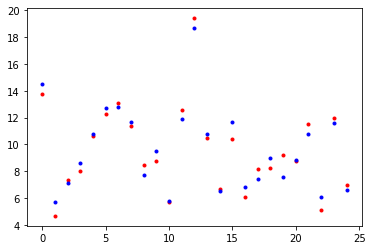

In [18]:
plt.plot(olsres.predict(),'r.',Y,'b.')
plt.show()